A linear nn applied on the fashionMNIST dataset classification problem. \
<a>https://www.youtube.com/watch?v=V_xro1bcAuA&t=58680s</a>\

<b>Network architecture</b>\
<img src="network_modelV0.jpg" width="700"/>

<i>NOTE that, the linear layer just applies y = W*x +b. no sigmoid function is applied automatically in pytorch</i>

In [2]:
import torch
from torch import nn 

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)


2.0.1+cpu


<b>Obtaining dataset </b>

In [3]:
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   transform=ToTensor(),
                                   target_transform=None,
                                   download=True)


In [4]:
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

Viewing image from the dataset

T-shirt/top


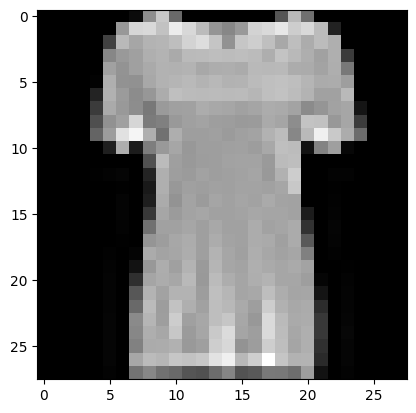

In [5]:
image, lab = train_data[10]
plt.imshow(image.squeeze(), cmap="gray")
print(train_data.classes[lab])

Dataloader

In [6]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

working with data loader objects

'Sandal'

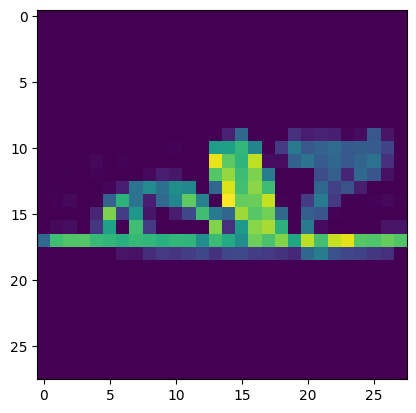

In [7]:
batch , label = next(iter(train_dataloader))
plt.imshow(batch[1, 0, :, :].squeeze())
train_data.classes[label[1]]

<b>A simple linear model to solve the classification problem</b>

In [8]:
# learning to work with the flatten layer
flatten_model = nn.Flatten(start_dim=1)

x, y = next(iter(train_dataloader))
img = x[0]
# plt.imshow(img)
out = flatten_model(img)
out.shape

torch.Size([1, 784])

In [9]:
# learning to work with nn.sequential
model = nn.Sequential(nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=784, out_features=10), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=10, out_features=10)
        )
print(type(model))
model(out) # out is a flattened image of size [1, 784]

<class 'torch.nn.modules.container.Sequential'>


tensor([[ 0.0961,  0.1589, -0.3339, -0.1616, -0.0693,  0.1903, -0.3255, -0.0223,
         -0.2894, -0.2555]], grad_fn=<AddmmBackward0>)

<b>now creating the model</b>\
model is a subclass of nn.Module\
nn.module provides many useful functions \
to know about them: 
<a>https://pytorch.org/docs/stable/generated/torch.nn.Module.html</a>

In [10]:
# creating the model class
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        # x is a [1, 28, 28] image
        return self.layer_stack(x)

Testing the forward pass to predict an img with the initial random weights and biases. \
<b>NOTE THAT: number of neurons in a layer = number of out_features of that layer</b>

In [11]:
model_0 = FashionMNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(train_data.classes))
model_0.to('cpu') #telling torch for running the model on cpu 

print(model_0.forward(img)) #predict output for an img
#see the weights and biases of the layers
#note that the weights and biases are randomly assigned as of now
print(model_0.state_dict().keys())

layer1weights = model_0.state_dict()["layer_stack.1.weight"]
print("layer1 weights: ", layer1weights)

print("layer1 weights: ", layer1weights.shape) 
print("layer1 bias: ", model_0.state_dict()["layer_stack.1.bias"].shape)
print("layer2 weights: ", model_0.state_dict()["layer_stack.2.weight"].shape)
print("layer2 bias: ", model_0.state_dict()["layer_stack.2.bias"].shape)

total_params = sum(p.numel() for p in model_0.parameters())
print("total params:" , total_params)

tensor([[-0.4276,  0.0733, -0.0072, -0.1394,  0.1099, -0.4281,  0.3358, -0.1715,
         -0.0980, -0.2569]], grad_fn=<AddmmBackward0>)
odict_keys(['layer_stack.1.weight', 'layer_stack.1.bias', 'layer_stack.2.weight', 'layer_stack.2.bias'])
layer1 weights:  tensor([[-0.0032, -0.0113,  0.0072,  ..., -0.0196,  0.0197, -0.0034],
        [ 0.0313, -0.0054, -0.0051,  ..., -0.0190,  0.0262,  0.0199],
        [-0.0121,  0.0110, -0.0136,  ...,  0.0266, -0.0183, -0.0290],
        ...,
        [-0.0316, -0.0009,  0.0130,  ...,  0.0124, -0.0142,  0.0123],
        [ 0.0264,  0.0104, -0.0207,  ..., -0.0347,  0.0079,  0.0356],
        [-0.0221,  0.0097, -0.0309,  ..., -0.0309, -0.0080, -0.0345]])
layer1 weights:  torch.Size([10, 784])
layer1 bias:  torch.Size([10])
layer2 weights:  torch.Size([10, 10])
layer2 bias:  torch.Size([10])
total params: 7960


<b>Required functions to know: </b> \
<i>loss_fn = nn.CrossEntropyLoss()</i> \
loss = loss_fn(model_prediction, known_prediction) \
\
<i>loss.backward()</i> \
performs gradient of loss function wrt all parameters(weights and biases) of the network\
\
<i> optimizer = torch.optim.SGD(params=model_name.parameters(). lr = 0.1) </i>\

optimizer.zero_grad()\
optimizer.step() -> updates the weights and biases of the model, according to the calculated gradient.\


<b>Why use model(data), instead of model.forward(data)?</b>\
When you call the model directly, the internal __call__ function is used.
This function manages all registered hooks and calls forward afterwards.
That’s also the reason you should call the model directly (and not model.forward(x)), because otherwise your hooks might not work etc.\



<b> the shape of the inputs to the loss_fn </b> \
In PyTorch, nn.CrossEntropyLoss() expects the input y_pred to have a shape of (batch_size, num_classes) and the target y_original to have a shape of (batch_size,).

In your case, y_pred has a shape of [32, 10], which means you have a batch of 32 samples and each sample has 10 predicted class scores. y_original has a shape of [32], indicating the target class labels for the corresponding samples.

The nn.CrossEntropyLoss() function will automatically handle the necessary computations to compute the loss between y_pred and y_original. It will apply the softmax function to y_pred internally to obtain class probabilities and then calculate the cross-entropy loss between the predicted probabilities and the target labels.

<b style="color:green">-----------Training our model-----</b>

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

In [13]:
epochs = 3

for epoch in range(epochs):
    print("training in epoch: ", epoch)
    train_loss = 0

    batch_count = 0
    for X, y in train_dataloader:
        batch_count += 1
        # X = a batch of 32 images
        # y = the corresponding labels for the images
        model_0.train() #setting our model to train mode. whether we are testing or training is needed to be known by some layers but not all
        #1 forward pass
        y_pred = model_0(X) 
        #2 loss for the batch
        if(batch_count == 1):
            print("y_pred", y_pred.shape)
            print("y",y, y.shape)
            
        loss = loss_fn(y_pred, y)
        #3 optimizer zero grad
        optimizer.zero_grad()
        #4 backward()
        loss.backward() #the backward function doesn't work without a forward pass prior to its call. hence we had to calulate loss. i guess the forward pass creates the necessary computational graph for gradient calculation
        #5 update weights
        optimizer.step()

        if (batch_count % 400 == 0):
            print("finished training with batch ", batch_count)

    print("finished training of epoch ", epoch)
    


training in epoch:  0
y_pred torch.Size([32, 10])
y tensor([8, 4, 3, 1, 6, 6, 2, 9, 8, 9, 0, 2, 7, 3, 1, 3, 1, 3, 0, 7, 1, 3, 0, 6,
        9, 8, 5, 7, 1, 3, 9, 3]) torch.Size([32])
finished training with batch  400
finished training with batch  800
finished training with batch  1200
finished training with batch  1600
finished training of epoch  0
training in epoch:  1
y_pred torch.Size([32, 10])
y tensor([0, 3, 1, 5, 3, 7, 8, 2, 8, 4, 7, 0, 3, 9, 9, 8, 4, 5, 4, 2, 7, 6, 0, 1,
        2, 2, 5, 0, 3, 9, 3, 0]) torch.Size([32])
finished training with batch  400
finished training with batch  800
finished training with batch  1200
finished training with batch  1600
finished training of epoch  1
training in epoch:  2
y_pred torch.Size([32, 10])
y tensor([6, 9, 0, 9, 2, 9, 9, 5, 8, 8, 7, 6, 0, 5, 9, 0, 5, 3, 6, 0, 4, 4, 2, 3,
        2, 6, 9, 1, 9, 2, 4, 8]) torch.Size([32])
finished training with batch  400
finished training with batch  800
finished training with batch  1200
finished traini

After training, we now have a trained model

In [14]:
model_0.eval() #letting pytorch know that we will test now, not train
#take an image from the dataset
X_test, y_test =  next(iter(test_dataloader))
# X_test = batch of 32 images for test 
# y_test = corresponding labels 
test_img = X_test[10] #one img out of the batch, taken out for testing
test_img_label = y_test[10]
classes = train_data.classes
print('original label: ', classes[test_img_label])

test_img_pred = model_0(test_img).argmax(dim=1)
print('predicted label: ', classes[test_img_pred]) 

original label:  Coat
predicted label:  Coat


now that we have seen that the model works properly for some randomly picked images, \
let's now find output for all images of the test_dataloader and compare it with the original_label to find the overall accuracy 

<b> accuracy = (no. of correct output / no. of total outputs) * 100 </b>

In [15]:
# a function for evaluating any model
def eval_model(model: torch.nn.Module,
               test_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module):
    model.train(mode=False) #same as model.eval()
    
    batch_size = test_dataloader.batch_size
    # going through the batches in test_dataloader
    correct_pred = 0
    total_loss = 0
    for X_test, y_test in test_dataloader:
        # X_test = batch of 32 image 
        # y_test = corresponding labels

        #accuracy
        y_pred = model(X_test)
        correct_pred += torch.eq(y_pred.argmax(dim=1), y_test).sum().item()
        
        #loss
        loss = loss_fn(y_pred, y_test)
        total_loss += loss
        
    accuracy = (correct_pred/((len(test_dataloader))*(batch_size) ))*100
    total_loss = total_loss/ (len(test_dataloader))

    # returning a dictionary
    return {"model_name":model.__class__.__name__,
            "model_acc":accuracy,
            "model_loss":total_loss}


eval_model(model_0, test_dataloader, loss_fn = loss_fn)

{'model_name': 'FashionMNISTModelV0',
 'model_acc': 82.80750798722045,
 'model_loss': tensor(0.4743, grad_fn=<DivBackward0>)}

<i><b>------DONE WITH CREATING THE MODEL-----</b></i>